# Problem 7.5.1 (Venice Sea Level, cf. [9], Example 5.1)

The annual maximum sea levels [in cm] in Venice, 1931-1981 have been recorded by P. A. Pirazzoli.

The data set venice.dat contains the annual maximum tides at Venice for the 51 years.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import scipy as scp

In [4]:
df = pd.read_csv('./venice.dat', sep='\t', )
print(df.head())

   Year  SeaLevel
0  1931       103
1  1932        78
2  1933       121
3  1934       116
4  1935       115


### a) Represent the data in a scatter diagram sea level versus year and describe the functional context in words.


In [8]:
year_min = df['Year'].min()
year_max = df['Year'].max()
print(year_min, year_max)

sea_level_min = df['SeaLevel'].min()
sea_level_max = df['SeaLevel'].max()
print(sea_level_min, sea_level_max)

1931 1981
78 194


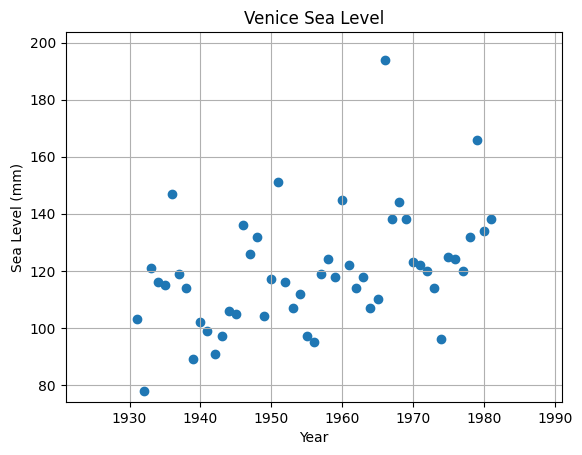

In [35]:
def plot_scatterplot(df):
  plt.close()

  plt.xlim(year_min-10, year_max+10)
  plt.ylim(sea_level_min*0.95, sea_level_max*1.05)

  plt.xlabel('Year')
  plt.ylabel('Sea Level (mm)')
  plt.title('Venice Sea Level')

  plt.scatter(df['Year'], df['SeaLevel'])

  plt.grid()

plot_scatterplot(df)

plt.show()

### b) Fit a straight line to the data points. Give the estimated parameter values.

In [17]:
x_bar = df['Year'].mean()
y_bar = df['SeaLevel'].mean()

Sxx = np.sum(np.square(df['Year'] - x_bar))
Sxy = np.sum((df['Year'] - x_bar) * (df['SeaLevel'] - y_bar))
print(f"{Sxx=}, {Sxy=}")

Sxx=11050.0, Sxy=6265.0


In [18]:
# slope
beta_1 = Sxy / Sxx

# intercept
beta_0 = y_bar - beta_1 * x_bar

print(f"{beta_0=}, {beta_1=}")

beta_0=-989.3822021116138, beta_1=0.5669683257918552


In [30]:
# calculate values for the regression line
y_hat = beta_0 + beta_1 * df['Year'] # estimated value: SeaLevelHat

# calculate residuals
res = df['SeaLevel'] - y_hat

# mean of residuals
res_mean = np.mean(res)

# sum of squares of residuals
sigma_2 = np.sum(res**2) * 1/(df.shape[0] - 2)

# standard deviation of residuals
sigma = np.sqrt(sigma_2)

print(f"{res_mean=}, {sigma_2=}, {sigma=}")


res_mean=-7.802037882856002e-14, sigma_2=346.695924523655, sigma=18.6197724079446


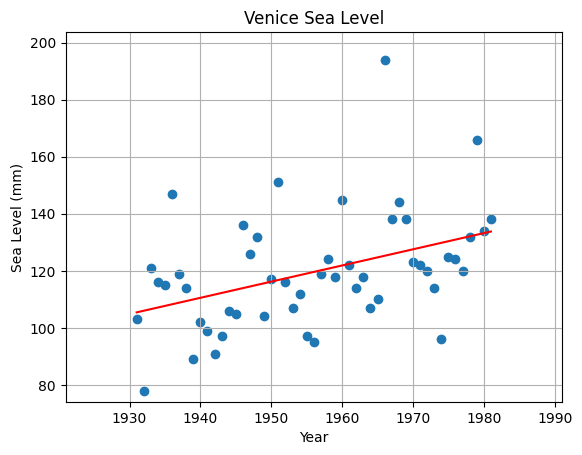

In [36]:
# plot regression line
plot_scatterplot(df)

plt.plot(df['Year'], y_hat, color='red')

plt.show()

### c) Add the model in the scatter diagram. Comment on the solution.

In [41]:
# create model
mod = smf.ols(formula='SeaLevel ~ Year', data=df) # SeaLevel is predicted variable by using one feature (Year)
fit = mod.fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:               SeaLevel   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     10.25
Date:                Sat, 20 Apr 2024   Prob (F-statistic):            0.00241
Time:                        14:38:27   Log-Likelihood:                -220.48
No. Observations:                  51   AIC:                             445.0
Df Residuals:                      49   BIC:                             448.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -989.3822    346.477     -2.856      0.0

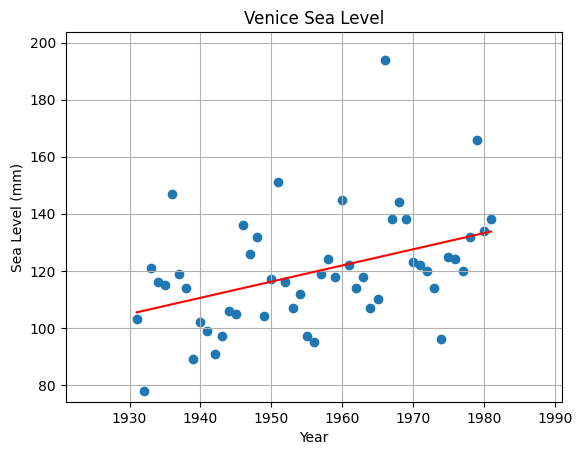

In [42]:
# print predicated line to scatterplot
plot_scatterplot(df)

plt.plot(df['Year'], fit.fittedvalues, color='red')

### d) Does the data support the hypothesis that Venice sinks?

Basic Idea: We assume Sea Level does NOT depend on Year (null hypothesis, slope H0 = 0). We check if H0 or H1 (slope H0 is NOT 0).

In [49]:
beta_1_0 = 0
beta_1_hat = fit.params.Year

# standard error ($S_{xx}$ from Ex. 7.2.1)
se_beta_1 = np.sqrt(sigma**2/Sxx)

# test statistic
test_beta_1 = (beta_1_hat - beta_1_0) / se_beta_1

print(beta_1_hat)
print(se_beta_1 )
print(test_beta_1)

0.5669683257918574
0.1771304513331094
3.200851810204128


In [52]:
alpha = 0.05
test_critical = scp.stats.t.ppf(1-alpha/2, df.shape[0]-2)
print(test_critical)

2.009575234489209


REMARK: Since abs(Test.beta1)=3.200852 > t.crit=2.009575 we reject the null hypothesis and conclude that the Sea level
depends significantly on the year.
In other words the data set supports the the hypothesis that Venice sinks.
The annual sinking rate is 0.5669683 cm/year.

In [54]:
# total amount of sinking
total_sinking = beta_1 * (year_max - year_min)
print(total_sinking)

28.34841628959276
